# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform
import pprint
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=50)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

temperature=[]
humidity=[]
max_temperature=[]
latitude=[]
wind_speed=[]
new_cities=[]
cloudiness=[]
country=[]
date=[]
longitude=[]




for city in range(len(cities)):
    try:

        weather_response = requests.get(query_url + str(cities[city]))
        weather_json = weather_response.json()        
        
        print(f"Making request number: {city +1} for city: {weather_json['name']}")

        
        temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        max_temperature.append(weather_json['main']['temp_max'])
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        wind_speed.append(weather_json['wind']['speed'])
        new_cities.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])      
        country.append(weather_json['sys']['country']) 
        date.append(weather_json['dt'])


             
              
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")



Making request number: 1 for city: Rikitea
------------
Making request number: 2 for city: Jalu
------------
Making request number: 3 for city: Kaitangata
------------
Making request number: 4 for city: Westport
------------
Making request number: 5 for city: Codrington
------------
Making request number: 6 for city: Ushuaia
------------
Making request number: 7 for city: Cidreira
------------
Missing field/result... skipping.
------------
Making request number: 9 for city: Tasiilaq
------------
Making request number: 10 for city: Gizo
------------
Making request number: 11 for city: Puertollano
------------
Making request number: 12 for city: La Ronge
------------
Making request number: 13 for city: Provideniya
------------
Making request number: 14 for city: Kapaa
------------
Making request number: 15 for city: Porbandar
------------
Making request number: 16 for city: Nyzhni Sirohozy
------------
Making request number: 17 for city: Mahad
------------
Missing field/result... skippin

Making request number: 145 for city: Arlit
------------
Making request number: 146 for city: Hobart
------------
Making request number: 147 for city: Taoudenni
------------
Making request number: 148 for city: San Cristobal
------------
Making request number: 149 for city: Saint-Augustin
------------
Missing field/result... skipping.
------------
Making request number: 151 for city: Kenai
------------
Making request number: 152 for city: Burgeo
------------
Making request number: 153 for city: Freetown
------------
Missing field/result... skipping.
------------
Making request number: 155 for city: Bafoulabe
------------
Making request number: 156 for city: Vallenar
------------
Making request number: 157 for city: Huntsville
------------
Making request number: 158 for city: Walvis Bay
------------
Making request number: 159 for city: Ocean City
------------
Making request number: 160 for city: Hithadhoo
------------
Making request number: 161 for city: Grindavik
------------
Making req

Making request number: 427 for city: Umm Lajj
------------
Making request number: 428 for city: Magistralnyy
------------
Making request number: 429 for city: Padang
------------
Making request number: 430 for city: Lerwick
------------
Making request number: 431 for city: Hailar
------------
Making request number: 432 for city: Guanica
------------
Making request number: 433 for city: Labuhan
------------
Making request number: 434 for city: Miyako
------------
Making request number: 435 for city: Bani
------------
Making request number: 436 for city: Gashua
------------
Making request number: 437 for city: Te Anau
------------
Making request number: 438 for city: Sao Joao da Barra
------------
Making request number: 439 for city: Tefe
------------
Making request number: 440 for city: Quirinopolis
------------
Making request number: 441 for city: Nuevo Progreso
------------
Making request number: 442 for city: Nantucket
------------
Making request number: 443 for city: Karacakoy
-----

Making request number: 569 for city: North Bend
------------
Making request number: 570 for city: Ongandjera
------------
Making request number: 571 for city: Turan
------------
Making request number: 572 for city: San Antonio de la Cal
------------
Missing field/result... skipping.
------------
Making request number: 574 for city: Mareeba
------------
Making request number: 575 for city: Olavarria
------------
Making request number: 576 for city: Kenora
------------
Making request number: 577 for city: Cuamba
------------
Making request number: 578 for city: Lagunas
------------
Making request number: 579 for city: Livingstone
------------
Making request number: 580 for city: Vestmanna
------------
Making request number: 581 for city: Conceicao da Barra
------------
Making request number: 582 for city: Hami
------------
Making request number: 583 for city: Adeje
------------
Making request number: 584 for city: Port-Cartier
------------
Making request number: 585 for city: Hirado
----

In [5]:
print(len(temperature))
print(len(humidity))
print(len(max_temperature))
print(len(latitude))
print(len(wind_speed))
print(len(new_cities))
print(len(country))
print(len(date))
print(len(longitude))
print(len(cloudiness))


cities_df = pd.DataFrame({'City': new_cities,
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date': date,
                          'Humidity ': humidity,
                          'Latitude': latitude,
                          'Longitude': longitude,
                          'Max Temp': max_temperature,
                          'Wind Speed': wind_speed
                          })
cities_df.head()



567
567
567
567
567
567
567
567
567
567


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,100,PF,1558929783,84,-23.12,-134.97,71.87,25.17
1,Jalu,19,LY,1558929783,16,29.03,21.55,84.11,12.53
2,Kaitangata,100,NZ,1558929783,80,-46.28,169.85,54.00,1.99
3,Westport,96,IE,1558929783,84,53.80,-9.52,53.01,21.00
4,Codrington,2,AU,1558929783,26,-28.95,153.24,80.60,20.80


In [12]:
cities_df.to_csv("../WeatherPy.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

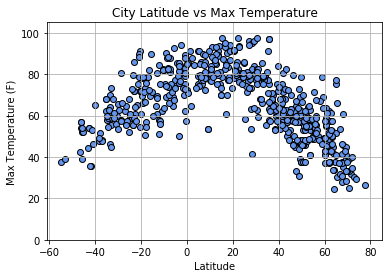

In [8]:
plt.scatter( latitude, max_temperature, marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.ylim(0,105)
plt.xlim(-61,85)

plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../Images/maxTempVsLatitude.png")

#### Latitude vs. Humidity Plot

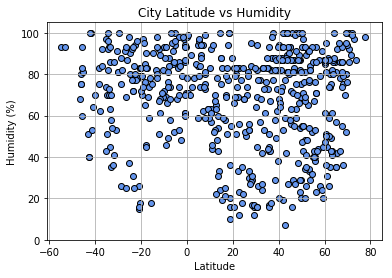

In [9]:
plt.scatter( latitude, humidity, marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.ylim(0,105)
plt.xlim(-61,85)

plt.title(f"City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../Images/humidityVsLatitude.png")

#### Latitude vs. Cloudiness Plot

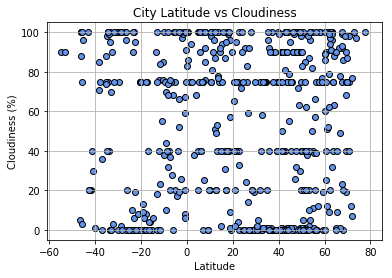

In [10]:
plt.scatter( latitude, cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.ylim(-5,105)
plt.xlim(-61,85)

plt.title(f"City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("../Images/cloudinessVsLatitude.png")

#### Latitude vs. Wind Speed Plot

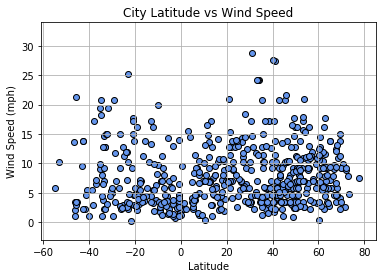

In [11]:
plt.scatter( latitude, wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.ylim(-3,34)
plt.xlim(-61,85)

plt.title(f"City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("../Images/windSpeedVsLatitude.png")